In [17]:
import pandas as pd
df = pd.read_csv("./dataset/file_pe_headers.csv" , sep=",")
y = df["Malware"]
X = df.drop(["Name" , "Malware"], axis=1).to_numpy()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size=0.3)

In [19]:
import plotly.express as px
fig = px.scatter_3d(
    df , 
    x = "SuspiciousImportFunctions",
    y = "SectionsLength",
    z = "SuspiciousNameSection",
    color= "Malware",
)
fig.show()

In [20]:
y = df["Malware"]
X = df.drop(["Name" , "Malware"], axis = 1).to_numpy()

In [21]:
from sklearn.cluster import KMeans

estimator = KMeans(n_clusters=len(set(y)))
estimator.fit(X)

KMeans(n_clusters=2)

In [22]:
y_pred = estimator.predict(X)
df["pred"] = y_pred
df["pred"] = df["pred"].astype("category")


In [23]:
import plotly.express as px
fig = px.scatter_3d(
    df , 
    x = "SuspiciousImportFunctions",
    y = "SectionsLength",
    z = "SuspiciousNameSection",
    color= "pred",
)
fig.show()

In [24]:
from xgboost import XGBClassifier
XGB_model_instance = XGBClassifier()
XGB_model_instance.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
from sklearn.metrics import accuracy_score 
y_test_pred = XGB_model_instance.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Acurracy: %.2f%%" % (accuracy * 100))

Acurracy: 99.35%


In [26]:
import numpy as np
import pandas as pd
random_seed = np.random.RandomState(12)



In [27]:
import numpy as np
import pandas as pd
random_seed = np.random.RandomState(12)

In [32]:
X_train = 0.5 * random_seed.randn(500,2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns= ["x", "y"])

In [33]:
X_outliers = random_seed.uniform(low=-5, high=5, size=(50,2))
X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])

<>:10: SyntaxWarning:

list indices must be integers or slices, not tuple; perhaps you missed a comma?

<>:10: SyntaxWarning:

list indices must be integers or slices, not tuple; perhaps you missed a comma?



AttributeError: 'numpy.ndarray' object has no attribute 'x'

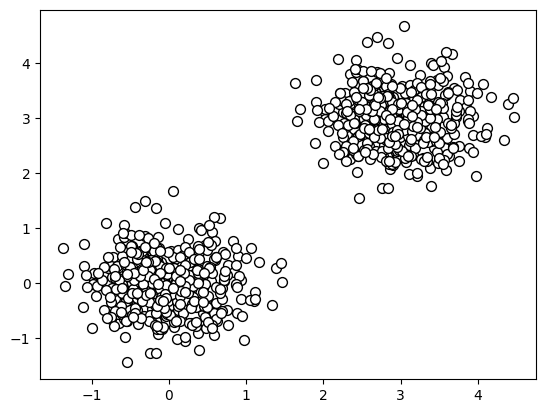

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train.x, X_train.y, c = "white", s = 50, edgecolors="black")
p2 = plt.scatter(X_test.x, X_test.y, c = "green", s = 50, edgecolors="black") 
p3 = plt.scatter(X_outliers.x, X_outliers.y, c = "blue", s = 50, edgecolors="black")
plt.xlim((-6,6))
plt.xlim((-6,6))
plt.legend(
    [p1,p2,p3]
    ["training set", "normal testing set", "anomalous testing set"],
    loc = "lower right",
)
plt.show